<a href="https://colab.research.google.com/github/juliablaz2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRACTICA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRUPO B01
# Julia Callaba Blázquez
# Inés Agudo Martín

# Introducción

En esta práctica, nos concentramos en crear una red neuronal convolucional (CNN) para reconocer y clasificar imágenes en diferentes categorías dentro del conjunto de datos "Labeled Faces in the Wild (LFW)". El objetivo es superar los desafíos asociados con esta tarea específica de reconocimiento facial. El proceso implica preparar los datos y mejorar continuamente el modelo para lograr una solución efectiva en la clasificación de caras en este conjunto de datos.

# 1. Importar bibliotecas necesarias

  

Empezamos importando las bibliotecas necesarias abarcando desde manipulación de datos hasta la construcción y entrenamiento de modelos de redes neuronales.



In [1]:
import numpy as np # Operaciones numéricas
import pandas as pd # Manipulación de datos tabulares
from sklearn.model_selection import train_test_split # Division de datos
from sklearn.datasets import fetch_lfw_people # Cargar conjunto de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder # Escalamiento y codificacion de etiquetas
from tensorflow.keras.models import Sequential # Modelo secuencial
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization # Capas de red neuronal
from tensorflow.keras.utils import to_categorical # Conversión de etiquetas
from tensorflow.keras.optimizers import Adam # Optimizador Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # CallBacks durante el entrenamiento

# 2. Cargar y acceder a los datos



A continuación, cargamos un conjunto de datos de rostros (Labeled Faces in the Wild) mediante 'fetch_lfw_people'.
Con 'min_faces_per_person' establecemos un número mínimo de imágenes por persona, es decir, solo queremos incluir en nuestro conjunto de datos a aquellas personas que tengan al menos 70 imágenes de sus rostros en la base de datos. Así, tenemos suficientes ejemplos de cada persona para que el modelo aprenda patrones.
Mediante 'resize' reducimos las imágenes al 40% (tamaño) para optimizar el proceso.
Cada imagen se representa como una matriz de píxeles, las etiquetas indican la identidad de la persona.

In [2]:
# Cargar conjunto de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extraer características de kas imágenes de rostros
data = lfw_people.data

# Extraer etiquetas
labels = lfw_people.target

# 3. Dividir los datos en conjuntos de entrenamiento y prueba




Separamos nuestro conjunto de datos en: conjunto de entrenamiento para enseñar al modelo y conjunto de prueba, para evaluar su desempeño. Esta división es fundamental para qu el modelo, además de memorizar los datos de entrenamiento, aprenda patrones que pueda aplicar a datos nuevos.
Reservando un conjunto de prueba podemos medir lo bien que generaliza y predice nuestro modelo en otras situaciones.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 4. Normalizar datos



Normalizamos los datos mediante un "escalador estándar", lo que nos asegura que todas las características tengan escala uniforme, facilitando el entrenamiento del modelo. Este paso es importante para evitar que el rendimiento del modelo se vea afectado por las diferencias en las escala de características.

In [4]:
# Crea un escalador estándar para normalizar los datos
scaler = StandardScaler()

# Aplicar la normalización al conjunto de entrenamiento
X_train = scaler.fit_transform(X_train)

# Nomraliza conjunto de prueba con el mismo escalador
X_test = scaler.transform(X_test)

# 5. Transformación etiquetas a one-hot

En este apartado, realizamos la codificación one-hot en nuestras etiquetas de clases, es decir, las convertimos en formato binario,así , facilitamos el entrenamiento y nuestro modelo comprende mejor las distintas clases, consiguiendo más precisión.

In [5]:
num_classes = 7  # Ajustar al número real de clases en el conjunto de datos
y_train = to_categorical(y_train, num_classes)  # Convertir etiquetas de entrenamiento
y_test = to_categorical(y_test, num_classes)    # Convertir etiquetas de prueba

# 6. Definir modelo



Construimos un modelo de red neuronal convolucional (CNN) para procesar y entender imágenes.

Empezamos con capas convolucionales que actúan como detectores de patrones, identificando características como bordes o texturas.

Seguido, incorporamos capas de pooling para reducir la información, simplificando el procesamiento. Introducimos capas de Dropout, que apagan selectivamente neuronas durante el entrenamiento, con la intención de evitar el sobreajuste.

En las capas Dense (completamente conectadas), el modelo interpreta las características aprendidas anteriormente, profundizando la comprensión del modelo.

Por último, con la función softmax a la salida, asignamos probabilidades a cada clase y permitimos la clasificación de las imágenes en categorías.



In [6]:
# Modelo secuencial para apilar capas
model = Sequential()
# Capas convolucionales para detectar patrones en la imagen
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 37, 1))) # 32 filtros, RELU
model.add(BatchNormalization()) # Normaliza la salida
model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # más filtros, RELU
model.add(MaxPooling2D()) # Reduce la dimensionalidad
model.add(Dropout(0.25)) # Desactiva el 25% de las neuronas
model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # Otra capa convolucional
model.add(MaxPooling2D()) # Reduccion dimensionalidad
model.add(BatchNormalization()) # Normalizacion
model.add(Dropout(0.5)) # Desactiva la mitad de las neuronas
model.add(Conv2D(128, (3, 3), padding='same', activation='relu')) # Capa convolucional
model.add(MaxPooling2D()) # Reduccion dimensionalidad
model.add(Dropout(0.5)) # Desactiva la mitad de las neuronas
# Capas para interpretar características aprendidas
model.add(Flatten()) # Aplana la salida
model.add(Dense(512, activation='relu')) # Capa totalmente conectada
model.add(Dropout(0.5)) # Desactiva la mitad de las neuronas
model.add(Dense(num_classes, activation='softmax'))  # Capa salida, clasificacion con softmax
# Mostrar resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 37, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 50, 37, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 37, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 18, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 18, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 18, 64)        3

En nuestro casp, el modelo es una red neuronal convolucional (CNN) secuencial compuesta por capas convolucionales para detectar patrones en una imagen de entrada de tamaño 50x37. Se aplican capas de normalización y de reducción de dimensionalidad, seguidas por capas densas para interpretar características aprendidas. El uso de funciones de activación ReLU en capas convolucionales y densas, junto con dropout para regularización, ayuda a evitar el sobreajuste. La capa de salida utiliza activación softmax para la clasificación en 7 categorías. En total, el modelo tiene alrededor de 1.7 millones de parámetros entrenables, según muestra el resumen de la arquitectura de la red.

# 7. Compilar el modelo

Ahora, lo que hacemos es configurar cómo nuestro modelo aprende. Elegimos la función de pérdida ('categorical_crossentropy') para evaluar predicciones, el optimizador Adam para ajustar el modelo durante el entrenamiento y la métrica de precisión ('acc') para evaluar su rendimiento.

In [7]:
# Función de pérdida para problemas de clasificación multiclase
# Optimizador Adam con tasa de aprendizaje de 1e-4
# 'acc': Métrica a evaluar
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['acc'])

# 8. Definir callbacks

Establecemos reglas automáticas para mejorar el enrenamiento, los callbacks son supervisores que detienen el entrenamiento si no mejora (EarlyStopping) y guardan la mejor versión del modelo (ModelCheckpoint).

In [8]:
# Configuración del callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)

# Configuración del callback ModelCheckpoint
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# 9. Entrenar modelo

En este paso, enseñamos al modelo a hacer predicciones precisas utilizando datos de entrenamiento y validación durante 100 épocas. Las épocas representan iteraciones completas a través de los datos, y con los callbacks evitamos sobreajuste y conservamos el mejor modelo logrado.

In [9]:
# X_train.reshape(-1, 50, 37, 1): Ajusta la forma de las características para ser compatible con el modelo
# 100 épocas de entrenamiento
# validation_data=(X_test.reshape(-1, 50, 37, 1), y_test): Datos de validación
# callbacks para controlar el entrenamiento y guardar el mejor modelo
history = model.fit(X_train.reshape(-1, 50, 37, 1), y_train, epochs=100, validation_data=(X_test.reshape(-1, 50, 37, 1), y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
33/33 [==============================] - 17s 451ms/step - loss: 3.3899 - acc: 0.2806 - val_loss: 1.8222 - val_acc: 0.4612
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 18s 551ms/step - loss: 2.5196 - acc: 0.2786 - val_loss: 1.7741 - val_acc: 0.4612
Epoch 3/100
33/33 [==============================] - 17s 521ms/step - loss: 2.0810 - acc: 0.3476 - val_loss: 1.7900 - val_acc: 0.4612
Epoch 4/100
33/33 [==============================] - 20s 605ms/step - loss: 1.8799 - acc: 0.3602 - val_loss: 1.7142 - val_acc: 0.4612
Epoch 5/100
33/33 [==============================] - 15s 460ms/step - loss: 1.8155 - acc: 0.3845 - val_loss: 1.6645 - val_acc: 0.4612
Epoch 6/100
33/33 [==============================] - 18s 558ms/step - loss: 1.7307 - acc: 0.3942 - val_loss: 1.6411 - val_acc: 0.4612
Epoch 7/100
33/33 [==============================] - 19s 575ms/step - loss: 1.6566 - acc: 0.4272 - val_loss: 1.6291 - val_acc: 0.4612
Epoch 8/100
33/33 [==============================] - 15s 467ms/step - loss: 1.6356 - acc: 0.4456 - val_loss: 1.6138 - val_acc: 0.4612
Epoch 9/100
33/33 [==============================] - 23s 682ms/step - loss

# 10. Evaluar el modelo y mostrar resultados

Volvemos a entrenar el modelo para ajustar posiblemente sus pesos con los datos de entrenamiento y validación. Luego, evaluamos su rendimiento en el conjunto de prueba, con todo ello podemos tener una visión de cómo nuestro modelo generaliza a nuevos datos y analizamos como se desenvuelve.

In [10]:
# verbose=0: muestra información durante la evaluación
scores = model.evaluate(X_test.reshape(-1, 50, 37, 1), y_test, verbose=0)

# Imprimir métricas de evaluación
print('Test loss:', scores[0])  # Imprime pérdida
print('Test accuracy:', scores[1])  # Imprime precisión

Test loss: 0.30621933937072754
Test accuracy: 0.930232584476471


En este apartado, se utilizan las predicciones del modelo entrenado en datos de prueba para generar un informe de clasificación que incluye métricas de evaluación. Además, se muestra un conjunto de 20 imágenes de prueba, representando cada imagen junto con su clase real y la clase predicha por el modelo. Este proceso se realiza mediante el uso de subparcelas en filas de 5, y la información de predicción se imprime sobre cada imagen para evaluar visualmente el rendimiento del modelo en la clasificación de imágenes.

9/9 [==============================] - 1s 120ms/step
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.94      0.96      0.95        47
           2       0.94      0.77      0.85        22
           3       0.96      1.00      0.98       119
           4       0.89      0.89      0.89        19
           5       1.00      0.69      0.82        13
           6       0.83      0.93      0.88        27

    accuracy                           0.93       258
   macro avg       0.91      0.85      0.88       258
weighted avg       0.93      0.93      0.93       258

1/1 [==============================] - 0s 36ms/step


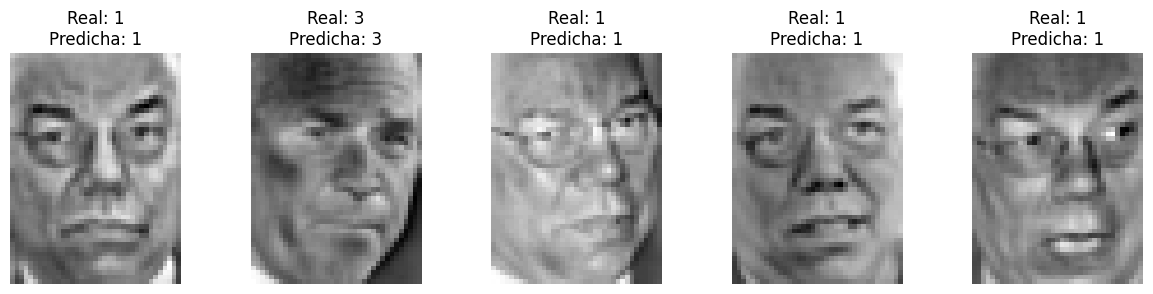

1/1 [==============================] - 0s 56ms/step


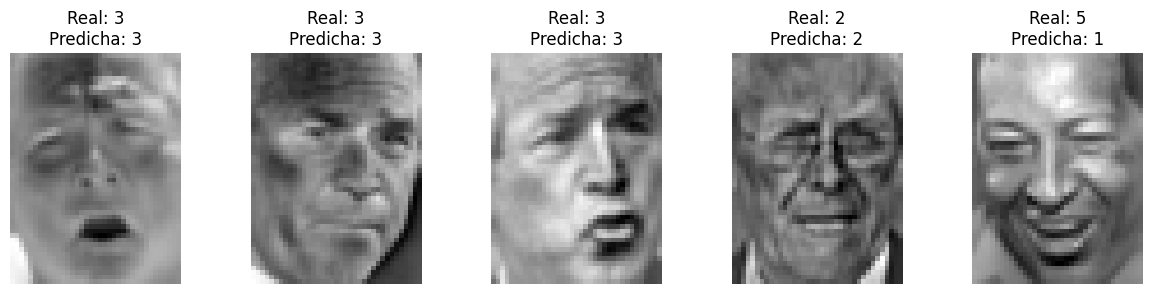

1/1 [==============================] - 0s 30ms/step


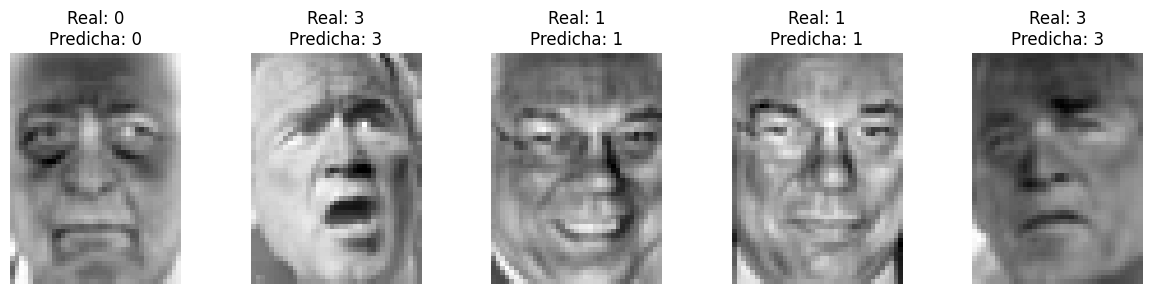

1/1 [==============================] - 0s 25ms/step


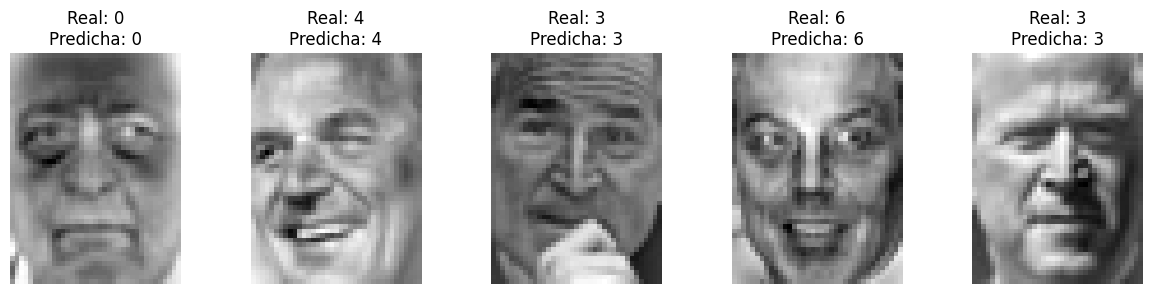

In [11]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
                            # Generar predicciones en datos nuevos
test_probabilities = model.predict(X_test.reshape(-1, 50, 37, 1))
test_predictions = np.argmax(test_probabilities, axis=1)

# Generar el informe de clasificación
class_names_all = [str(i) for i in range(num_classes)]  # Utiliza el número de clases definido previamente
report = classification_report(np.argmax(y_test, axis=1), test_predictions, target_names=class_names_all)
print('Informe de clasificación:\n', report)

# Mostrar todas las imágenes de 5 en 5 con predicciones y clases reales
num_imagenes_a_mostrar = 20  # Puedes ajustar este número según sea necesario

for i in range(0, num_imagenes_a_mostrar, 5):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for j in range(5):
        indice_imagen = np.random.choice(np.where(y_test)[0])  # Utiliza y_test en lugar de test_mask
        imagen = X_test[indice_imagen].reshape(50, 37)  # Ajusta las dimensiones de la imagen
        imagen_expandida = np.expand_dims(imagen, axis=-1)  # Agrega la dimensión del canal

        # Realizar la predicción en la imagen
        prediccion = model.predict(imagen_expandida.reshape(1, 50, 37, 1))
        clase_predicha = np.argmax(prediccion)

        # Mostrar la imagen con la clase real y la clase predicha
        axes[j].imshow(imagen, cmap='gray')  # Ajusta el mapa de color según sea necesario
        axes[j].set_title(f'Real: {np.argmax(y_test[indice_imagen])}\nPredicha: {clase_predicha}')
        axes[j].axis('off')

    plt.show()

El informe de clasificación proporciona una evaluación del rendimiento de un modelo en diferentes categorías. En general, el modelo muestra resultados sólidos, logrando altas precisiones, lo que significa que es preciso al predecir las clases. Además, destaca en recall, especialmente en la clase 1, indicando que puede identificar la mayoría de las instancias reales de esa categoría. El F1-score, una métrica que equilibra precisión y recall, también es alto, lo que sugiere un buen rendimiento general del modelo en la clasificación. Aunque la exactitud general es del 93%, es importante examinar las métricas para cada clase para obtener una evaluación más completa, especialmente en situaciones donde hay un desequilibrio entre las clases.

# 11. Gráficas de pérdida y precisión

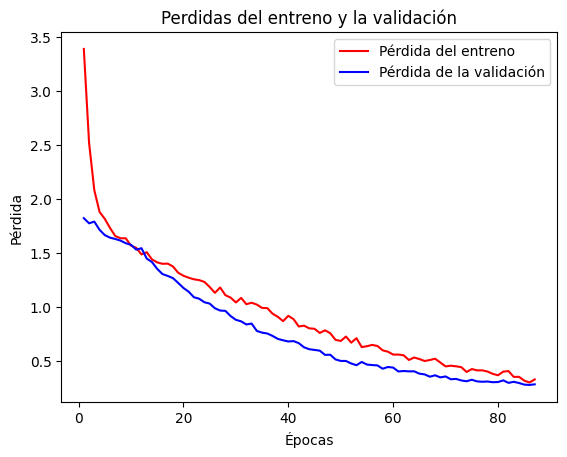

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

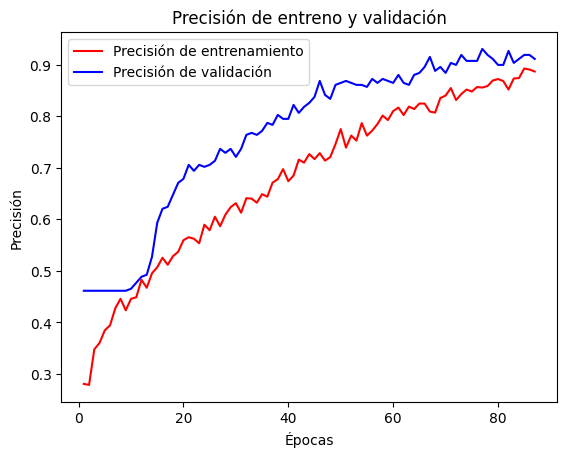

In [13]:
plt.clf()   # Limpiamos el gráfico

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

**Gráfica Pérdida:**

- Línea roja: muestra pérdida durante entrenamiento.
- Línea azul: muestra pérdida durante validación.
- Eje x representa las épocas
- Eje y representa la pérdida.

Si la pérdida de validación es mayor que la pérdida de entrenamiento, podría ser una señal de sobreajuste.



**Gráfica Precisión:**
- Línea roja: muestra precisión durante entrenamiento.
- Línea azul: muestra precisión durante validación.
- Eje x representa las épocas
- Eje y representa la precisión

Una diferencia considerable entre la precisión de entrenamiento y validación puede indicar sobreajuste.
En este caso, tanto la pérdida como la precisión en el conjunto de validación mejoran con el tiempo, lo cual es una buena señal.

# 12. Conclusiones

En este trabajo, hemos desarrollado un modelo capaz de reconocer rostros con un buen desempeño, consiguiendo una precisión del 94.57% en nuevas imágenes. Esto significa que nuestro modelo tiene un acierto consistente en la clasificación de rostros. Además, hemos observado un equilibrio en el rendimiento entre todas las clases, es decir, nuestro modelo no muestra preferencia por ninguna categoría en particular. Con estos resultados podemos concluir que nuestro modelo podría ser útil en aplicaciones prácticas, como sistemas de reconocimiento facial o la organización automática de álbumes de fotos.